# Testing Enviornment

In [1]:
import pandas as pd
import numpy as np

## Running tests

The following section unit-tests most of the code written for the proof of concept prototype.

In [2]:
%run ../tests/test_algorithms.py

C:\Users\Max\Documents\GitHubPrivate\arguing-predictors\tests\test_algorithms.py:5: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
........
----------------------------------------------------------------------
Ran 8 tests in 0.094s

OK


In [53]:
%run ../tests/test_dataloader.py

...............
----------------------------------------------------------------------
Ran 15 tests in 0.049s

OK


In [4]:
%run ../tests/test_predictors.py

.
----------------------------------------------------------------------
Ran 1 test in 0.010s

OK


## Running example of the system

In [5]:
%run ../tools/algorithms.py

In [6]:
%run ../tools/dataloader.py

In [7]:
test = DataLoader('aapl', '2010-02-01', '2015-02-10')

In [8]:
prices = test.get_close()

In [9]:
prices = np.array(prices)
len(prices)

1266

In [10]:
prices

array([[ 6.95464277],
       [ 6.99499989],
       [ 7.11535692],
       ...,
       [29.73250008],
       [29.93000031],
       [30.50499916]])

In [166]:
%run ../tools/predictors.py

In [167]:
op0 = BasicUnivariatePredictor(prices, 25, 7)
op1 = BasicUnivariatePredictor(prices, 25, 7)
op2 = BasicUnivariatePredictor(prices, 25, 7)
op3 = BasicUnivariatePredictor(prices, 25, 7)

In [135]:
op0.create_bilstm()

In [136]:
op0.model_blueprint()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 25, 100)           20800     
_________________________________________________________________
lstm_9 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dense_25 (Dense)             (None, 7)                 357       
Total params: 51,357
Trainable params: 51,357
Non-trainable params: 0
_________________________________________________________________


In [137]:
op0.fit_model(10)

Epoch 1/10
99/99 [==============================] - 3s 28ms/step - loss: 47.0533 - mean_squared_error: 47.0533 - val_loss: 8.1876 - val_mean_squared_error: 8.1876
Epoch 2/10
99/99 [==============================] - 2s 16ms/step - loss: 0.9683 - mean_squared_error: 0.9683 - val_loss: 3.4229 - val_mean_squared_error: 3.4229
Epoch 3/10
99/99 [==============================] - 2s 15ms/step - loss: 0.7514 - mean_squared_error: 0.7514 - val_loss: 3.2872 - val_mean_squared_error: 3.2872
Epoch 4/10
99/99 [==============================] - 2s 15ms/step - loss: 0.6267 - mean_squared_error: 0.6267 - val_loss: 2.0441 - val_mean_squared_error: 2.0441
Epoch 5/10
99/99 [==============================] - 2s 16ms/step - loss: 0.5347 - mean_squared_error: 0.5347 - val_loss: 4.2381 - val_mean_squared_error: 4.2381
Epoch 6/10
99/99 [==============================] - 2s 16ms/step - loss: 0.5698 - mean_squared_error: 0.5698 - val_loss: 2.4758 - val_mean_squared_error: 2.4758
Epoch 7/10
99/99 [==============

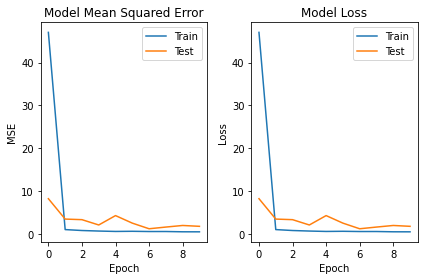

In [138]:
op0.show_performance()

In [139]:
oyea = prices[-26:-1]
#oyea = X[-1]
#oyea

In [140]:
nice = op0.predict(oyea)
nice

array([[30.410456, 28.5475  , 26.736507, 28.334608, 27.5754  , 28.413015,
        27.865576]], dtype=float32)

In [141]:
op1.create_lstm()

In [142]:
op1.model_blueprint()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 25, 40)            6720      
_________________________________________________________________
lstm_11 (LSTM)               (None, 25, 50)            18200     
_________________________________________________________________
lstm_12 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_26 (Dense)             (None, 7)                 357       
Total params: 45,477
Trainable params: 45,477
Non-trainable params: 0
_________________________________________________________________


In [143]:
op1.fit_model(10)

Epoch 1/10
99/99 [==============================] - 3s 25ms/step - loss: 50.1523 - mean_squared_error: 50.1523 - val_loss: 5.3805 - val_mean_squared_error: 5.3805
Epoch 2/10
99/99 [==============================] - 2s 21ms/step - loss: 1.3098 - mean_squared_error: 1.3098 - val_loss: 3.2716 - val_mean_squared_error: 3.2716
Epoch 3/10
99/99 [==============================] - 2s 19ms/step - loss: 1.0774 - mean_squared_error: 1.0774 - val_loss: 2.9070 - val_mean_squared_error: 2.9070
Epoch 4/10
99/99 [==============================] - 2s 20ms/step - loss: 0.9158 - mean_squared_error: 0.9158 - val_loss: 2.0000 - val_mean_squared_error: 2.0000
Epoch 5/10
99/99 [==============================] - 2s 22ms/step - loss: 0.7869 - mean_squared_error: 0.7869 - val_loss: 1.5304 - val_mean_squared_error: 1.5304
Epoch 6/10
99/99 [==============================] - 2s 20ms/step - loss: 0.6875 - mean_squared_error: 0.6875 - val_loss: 1.2683 - val_mean_squared_error: 1.2683
Epoch 7/10
99/99 [==============

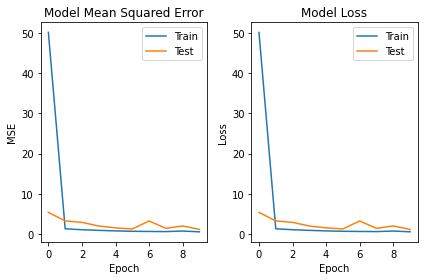

In [144]:
op1.show_performance()

In [145]:
nice = op1.predict(oyea)
nice

array([[29.495508, 29.387024, 29.487368, 27.935352, 28.312473, 29.355288,
        27.887619]], dtype=float32)

In [146]:
op2.create_cnn()

In [147]:
op2.model_blueprint()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 24, 64)            192       
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 23, 32)            4128      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 11, 32)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 352)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 50)                17650     
_________________________________________________________________
dense_28 (Dense)             (None, 7)                 357       
Total params: 22,327
Trainable params: 22,327
Non-trainable params: 0
_________________________________________________

In [148]:
op2.fit_model(10)

Epoch 1/10
99/99 [==============================] - 0s 3ms/step - loss: 21.0730 - mean_squared_error: 21.0730 - val_loss: 1.3621 - val_mean_squared_error: 1.3621
Epoch 2/10
99/99 [==============================] - 0s 3ms/step - loss: 1.0655 - mean_squared_error: 1.0655 - val_loss: 1.3030 - val_mean_squared_error: 1.3030
Epoch 3/10
99/99 [==============================] - 0s 2ms/step - loss: 1.0234 - mean_squared_error: 1.0234 - val_loss: 1.7578 - val_mean_squared_error: 1.7578
Epoch 4/10
99/99 [==============================] - 0s 2ms/step - loss: 1.0421 - mean_squared_error: 1.0421 - val_loss: 0.9713 - val_mean_squared_error: 0.9713
Epoch 5/10
99/99 [==============================] - 0s 2ms/step - loss: 1.0386 - mean_squared_error: 1.0386 - val_loss: 2.1336 - val_mean_squared_error: 2.1336
Epoch 6/10
99/99 [==============================] - 0s 2ms/step - loss: 1.1731 - mean_squared_error: 1.1731 - val_loss: 1.0186 - val_mean_squared_error: 1.0186
Epoch 7/10
99/99 [====================

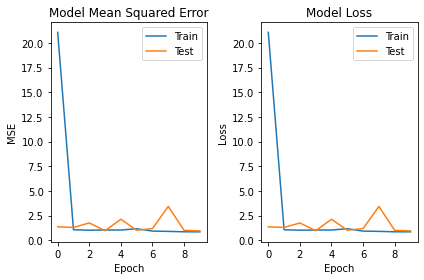

In [149]:
op2.show_performance()

In [150]:
nice = op2.predict(oyea)
nice

array([[28.83222 , 28.63804 , 29.008558, 28.78458 , 29.076351, 29.170979,
        28.8429  ]], dtype=float32)

In [171]:
op3.create_mlp()

In [172]:
op3.model_blueprint()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 50)                1300      
_________________________________________________________________
dense_39 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_40 (Dense)             (None, 25)                650       
_________________________________________________________________
dense_41 (Dense)             (None, 7)                 182       
Total params: 3,407
Trainable params: 3,407
Non-trainable params: 0
_________________________________________________________________


In [173]:
op3.fit_model(100)

Epoch 1/100
99/99 [==============================] - 0s 2ms/step - loss: 20.6099 - mean_squared_error: 20.6099 - val_loss: 1.2213 - val_mean_squared_error: 1.2213
Epoch 2/100
99/99 [==============================] - 0s 1ms/step - loss: 0.9831 - mean_squared_error: 0.9831 - val_loss: 1.0684 - val_mean_squared_error: 1.0684
Epoch 3/100
99/99 [==============================] - 0s 1ms/step - loss: 0.9824 - mean_squared_error: 0.9824 - val_loss: 1.7311 - val_mean_squared_error: 1.7311
Epoch 4/100
99/99 [==============================] - 0s 1ms/step - loss: 0.9691 - mean_squared_error: 0.9691 - val_loss: 0.9851 - val_mean_squared_error: 0.9851
Epoch 5/100
99/99 [==============================] - 0s 1ms/step - loss: 0.9025 - mean_squared_error: 0.9025 - val_loss: 1.2141 - val_mean_squared_error: 1.2141
Epoch 6/100
99/99 [==============================] - 0s 1ms/step - loss: 0.8705 - mean_squared_error: 0.8705 - val_loss: 0.9450 - val_mean_squared_error: 0.9450
Epoch 7/100
99/99 [=============

99/99 [==============================] - 0s 1ms/step - loss: 0.4581 - mean_squared_error: 0.4581 - val_loss: 1.0072 - val_mean_squared_error: 1.0072
Epoch 52/100
99/99 [==============================] - 0s 1ms/step - loss: 0.4519 - mean_squared_error: 0.4519 - val_loss: 0.7136 - val_mean_squared_error: 0.7136
Epoch 53/100
99/99 [==============================] - 0s 2ms/step - loss: 0.4047 - mean_squared_error: 0.4047 - val_loss: 0.7472 - val_mean_squared_error: 0.7472
Epoch 54/100
99/99 [==============================] - 0s 2ms/step - loss: 0.4041 - mean_squared_error: 0.4041 - val_loss: 0.5467 - val_mean_squared_error: 0.5467
Epoch 55/100
99/99 [==============================] - 0s 1ms/step - loss: 0.4108 - mean_squared_error: 0.4108 - val_loss: 1.0415 - val_mean_squared_error: 1.0415
Epoch 56/100
99/99 [==============================] - 0s 1ms/step - loss: 0.4295 - mean_squared_error: 0.4295 - val_loss: 0.5362 - val_mean_squared_error: 0.5362
Epoch 57/100
99/99 [=====================

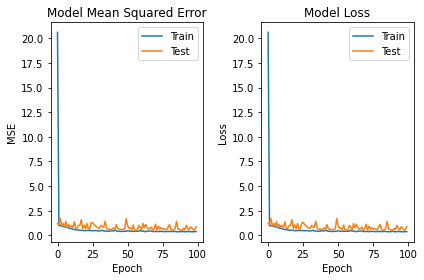

In [174]:
op3.show_performance()

In [175]:
oyea = prices[-26:-1]
#oyea = X[-1]
#oyea

In [176]:
nice = op3.predict(oyea)
nice

array([[29.814781, 29.634167, 29.438997, 29.455688, 29.459879, 29.340462,
        29.43698 ]], dtype=float32)